In [2]:
import sys
import pandas as pd
import numpy as np
np.random.seed(1423)
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [3]:
une_USA=pd.read_csv('une_USA.csv')
une_EU=pd.read_csv('une_EU.csv')
IFT=pd.read_csv('IFT_CNEUUSA.csv')
une_CN=pd.read_csv('china-unemployment-rate.csv')
GDP = pd.read_csv('GDP2.csv')

In [4]:
une_CN = une_CN.drop(range(0, 15))
une_CN = une_CN.drop(une_CN.columns[3], axis=1)
une_CN.columns = une_CN.iloc[0]
une_CN = une_CN.drop(une_CN.index[0])
une_CN.reset_index(drop=True, inplace=True)

une_EU=une_EU[[ 'TIME_PERIOD', 'OBS_VALUE']]

IFT_EU = IFT[IFT['LOCATION'].isin(['DNK', 'FRA', 'DEU'])][[ 'TIME', 'Value']]
IFT_CN = IFT[IFT['LOCATION'] == 'CHN'][[ 'TIME', 'Value']]
IFT_USA = IFT[IFT['LOCATION'] == 'USA'][[ 'TIME', 'Value']]


In [5]:
GDP_CN = pd.DataFrame(GDP['40'].loc[4:])
GDP_CN = GDP_CN.rename(columns={GDP_CN.columns[0]: 'GDP'})
GDP_CN.insert(0, 'Year', range(1960, 2022))

GDP_DEU	 = pd.DataFrame(GDP['55'].loc[4:])
GDP_DEU	= GDP_DEU.rename(columns={GDP_DEU	.columns[0]: 'GDP'})
GDP_DEU	.insert(0, 'Year', range(1960, 2022))

GDP_FRA = pd.DataFrame(GDP['77'].loc[4:])
GDP_FRA= GDP_FRA.rename(columns={GDP_FRA.columns[0]: 'GDP'})
GDP_FRA.insert(0, 'Year', range(1960, 2022))

GDP_DNK = pd.DataFrame(GDP['58'].loc[4:])
GDP_DNK= GDP_DNK.rename(columns={GDP_DNK.columns[0]: 'GDP'})
GDP_DNK.insert(0, 'Year', range(1960, 2022))

GDP_USA = pd.DataFrame(GDP['251'].loc[4:])
GDP_USA= GDP_USA.rename(columns={GDP_USA.columns[0]: 'GDP'})
GDP_USA.insert(0, 'Year', range(1960, 2022))

In [6]:
IFT_CN['TIME'] = IFT_CN['TIME'].astype(str)
IFT_CN['TIME'] = pd.to_datetime(IFT_CN['TIME'].str.replace('Q', ''), format='%Y-%m')
IFT_CN_GROUP = IFT_CN[:-3].groupby([pd.Grouper(key="TIME",freq="Y")])[["Value"]].sum().reset_index()
IFT_CN_1994_2021 = IFT_CN_GROUP["Value"].reset_index(drop=True)
GDP_CN_1994_2021 = GDP_CN["GDP"][34:].reset_index(drop=True)
UNE_CN_1994_2021 = une_CN[" Unemployment Rate (%)"][3:].reset_index(drop=True).astype("float64")
COUNTRY_CN = [0 for _ in range(28)]
d1 = {"COUNTRY":COUNTRY_CN, "IFT":IFT_CN_1994_2021, "UNE":UNE_CN_1994_2021, "GDP":GDP_CN_1994_2021}
df1 = pd.DataFrame(data=d1, index=None)

In [7]:
IFT_USA['TIME'] = IFT_USA['TIME'].astype(str)
IFT_USA['TIME'] = pd.to_datetime(IFT_USA['TIME'].str.replace('Q', ''), format='%Y-%m')
IFT_USA_GROUP = IFT_USA[37:-3].groupby([pd.Grouper(key="TIME",freq="Y")])[["Value"]].sum().reset_index()
IFT_USA_1994_2021 = IFT_USA_GROUP["Value"].reset_index(drop=True)
GDP_USA_1994_2021 = GDP_USA["GDP"][34:].reset_index(drop=True)
une_USA['DATE'] = pd.to_datetime(une_USA['DATE'])
une_USA = une_USA[une_USA['DATE'].dt.strftime('%m-%d') == '01-01'].reset_index(drop=True)
UNE_USA_1994_2021 = une_USA["UNRATE"][47:-1].reset_index(drop=True)
COUNTRY_USA = [1 for _ in range(28)]
d2 = {"COUNTRY":COUNTRY_USA, "IFT":IFT_USA_1994_2021, "UNE":UNE_USA_1994_2021, "GDP":GDP_USA_1994_2021}
df2 = pd.DataFrame(data=d2, index=None)
df2

,COUNTRY,IFT,UNE,GDP
0,1,10.427511,5.6,7287240000000.0
1,1,11.225440,5.6,7639750000000.0
2,1,11.720703,5.3,8073120000000.0
3,1,9.363293,4.6,8577550000000.0
4,1,6.208620,4.3,9062820000000.0
5,1,8.745520,4.0,9631170000000.0
6,1,13.504673,4.2,10250900000000.0
7,1,11.324636,5.7,10581900000000.0
8,1,6.341590,5.8,10929100000000.0
9,1,9.089889,5.7,11456400000000.0


In [11]:
IFT_EU['TIME'] = pd.to_datetime(IFT_EU['TIME'])
IFT_EU = IFT_EU[IFT_EU['TIME'].dt.strftime('%m-%d') == '01-01'].reset_index(drop=True)
IFT_EU = IFT_EU.groupby("TIME").sum().reset_index()
IFT_EU_1994_2021 = IFT_EU["Value"][9:-1].reset_index(drop=True).astype("float64")
GDP_EU = GDP_DEU["GDP"][34:].astype("float64") + GDP_FRA["GDP"][34:].astype("float64") + GDP_DNK["GDP"][34:].astype("float64")
GDP_EU_1994_2021 = GDP_EU.reset_index(drop=True)
une_EU['TIME_PERIOD'] = pd.to_datetime(une_EU['TIME_PERIOD'])
une_EU = une_EU[une_EU['TIME_PERIOD'].dt.strftime('%m') == '01'].reset_index(drop=True)
une_EU = une_EU.groupby("TIME_PERIOD").sum().reset_index()
UNE_EU_1994_2021 = une_EU["OBS_VALUE"][11:-2].reset_index(drop=True).astype("float64")
UNE_EU_1994_2021 = UNE_EU_1994_2021/3
COUNTRY_EU = [2 for _ in range(28)]
d3 = {"COUNTRY":COUNTRY_EU, "IFT":IFT_EU_1994_2021, "UNE":UNE_EU_1994_2021, "GDP":GDP_EU_1994_2021}
df3 = pd.DataFrame(data=d3, index=None)

In [13]:
df = pd.concat([df1, df2, df3], ignore_index=True)
#time_list = [i for i in range(1994, 2022)]
#df["TIME"] = time_list + time_list + time_list
df

,COUNTRY,IFT,UNE,GDP
0,0,96.713190,2.900000,564325000000.0
1,0,68.191960,3.000000,734548000000.0
2,0,33.327719,3.120000,863747000000.0
3,0,11.222342,3.230000,961604000000.0
4,0,-3.099461,3.240000,1029040000000.0
...,...,...,...,...
79,2,3.843396,9.700000,6618121000000.0
80,2,3.274538,8.866667,7122241000000.0
81,2,3.771186,8.300000,6963599000000.0
82,2,3.430137,7.866667,6883902000000.0


Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.518403187959635e+24, tolerance: 5.130746765664939e+22
Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.077982972229989e+25, tolerance: 6.079773711083599e+22
Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.077989041002966e+25, tolerance: 6.079773711083599e+22
Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.393417404779055e+24, tolerance: 6.079773711083599e+22
Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.077988904003467e+25, tolerance: 6.079773711083599e+22


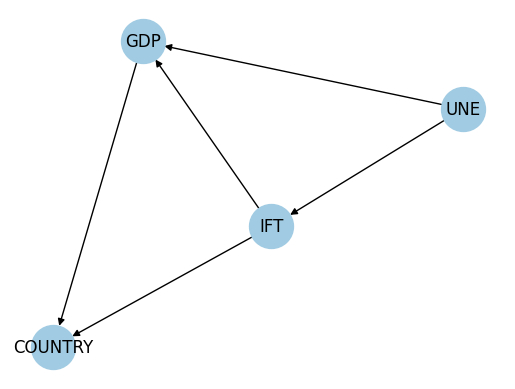

In [163]:
import cdt
from cdt import SETTINGS
SETTINGS.verbose=True
#SETTINGS.NJOBS=16
#SETTINGS.GPU=1
import networkx as nx
import matplotlib.pyplot as plt
plt.axis('off')

# Finding the structure of the graph
glasso = cdt.independence.graph.Glasso()
skeleton = glasso.predict(df)

# Pairwise setting
model = cdt.causality.pairwise.ANM()
output_graph = model.predict(df, skeleton)

# Visualize causality graph
options = {
        "node_color": "#A0CBE2",
        "width": 1,
        "node_size":1000,
        "edge_cmap": plt.cm.Blues,
        "with_labels": True,
    }
nx.draw_networkx(output_graph,**options)


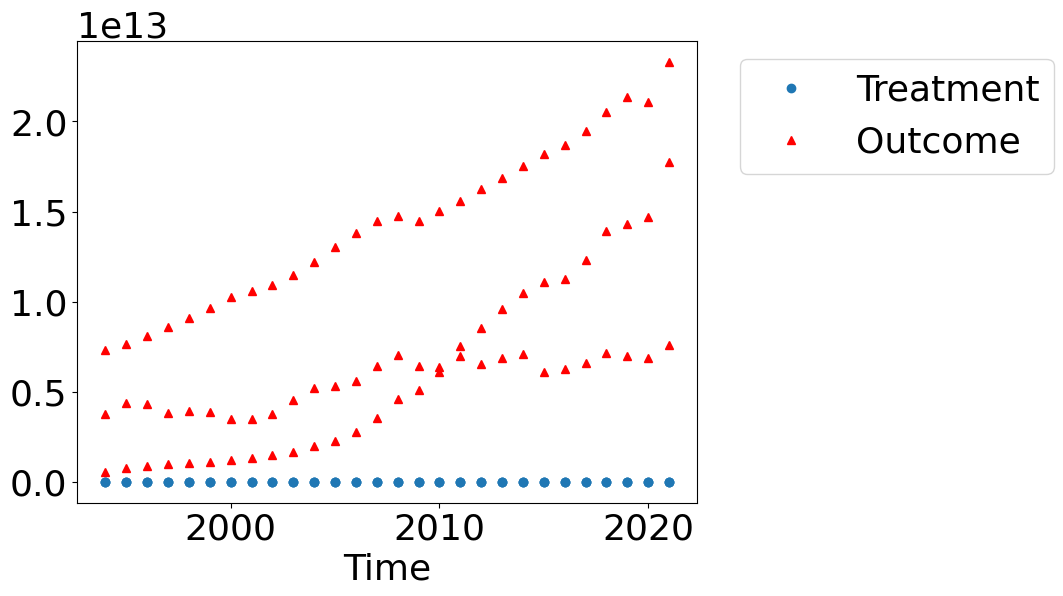

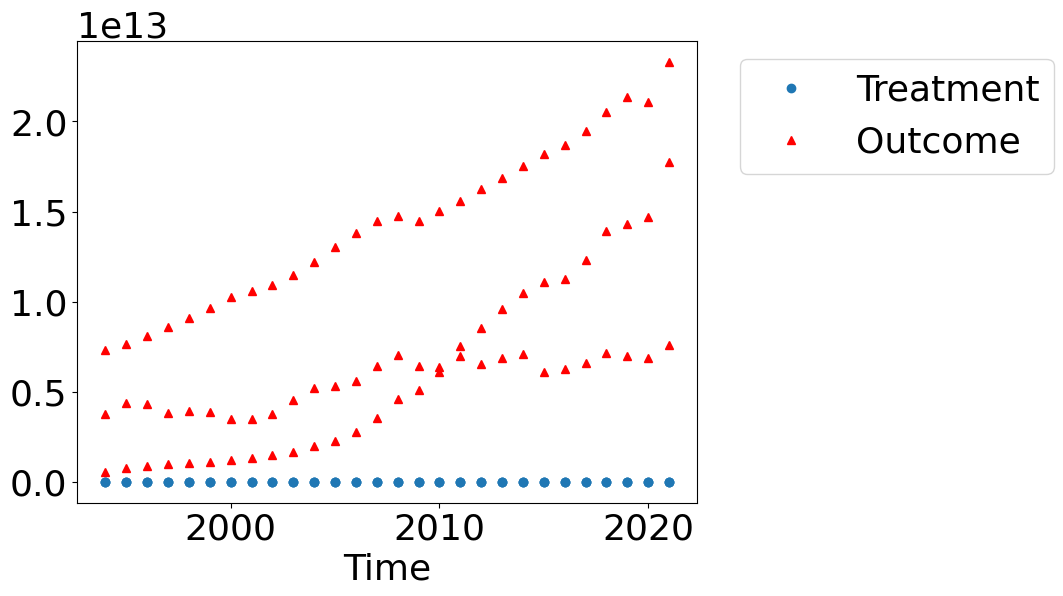

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import dowhy.datasets, dowhy.plotter
from dowhy import CausalModel

#rvar = 1 if np.random.uniform() > 0.2 else 0
#is_linear = False # A non-linear dataset. Change to True to see results for a linear dataset.
#data_dict = dowhy.datasets.xy_dataset(10000, effect=rvar, num_common_causes=2, is_linear=is_linear, sd_error=0.2)
#df = data_dict['df']
#print(df.head())
#dowhy.plotter.plot_treatment_outcome(df[data_dict["treatment_name"]], df[data_dict["outcome_name"]], df[data_dict["time_val"]])
dowhy.plotter.plot_treatment_outcome(df["IFT"], df["GDP"].astype("float"), df["TIME"])
dowhy.plotter.plot_treatment_outcome(df["UNE"], df["GDP"].astype("float"), df["TIME"])

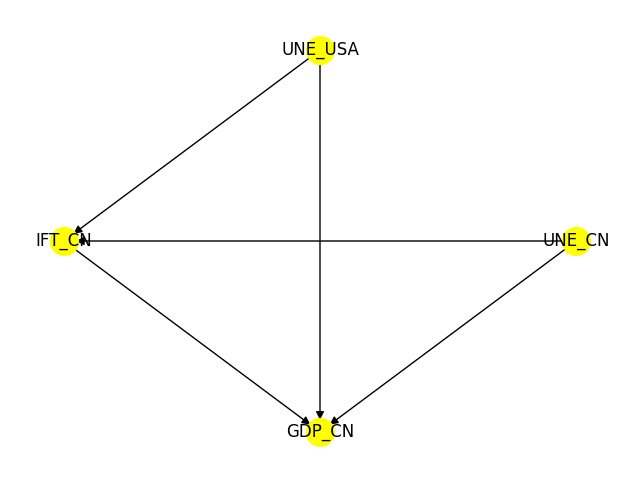

In [139]:
#model= CausalModel(
        #data=df,
        #treatment=data_dict["treatment_name"],
        #outcome=data_dict["outcome_name"],
        #common_causes=data_dict["common_causes_names"],
        #instruments=data_dict["instrument_names"])
#model.view_model(layout="dot")
model= CausalModel(
        data=df,
        treatment="IFT_CN",
        outcome="GDP_CN",
        common_causes=["UNE_CN", "UNE_USA"],
        )
model.view_model(layout="dot")

In [140]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                              
─────────(E[GDP_CN|UNE_USA,UNE_CN])
d[IFT_CN]                          
Estimand assumption 1, Unconfoundedness: If U→{IFT_CN} and U→GDP_CN then P(GDP_CN|IFT_CN,UNE_USA,UNE_CN,U) = P(GDP_CN|IFT_CN,UNE_USA,UNE_CN)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

